In [135]:
# Settings
import pandas_bokeh
pandas_bokeh.output_notebook()
#pandas_bokeh.output_file("Interactive Plot.html") # Alternatively
import pandas as pd
pd.set_option('plotting.backend', 'pandas_bokeh')

Loading BokehJS ...

In [149]:
# Load some data
API_KEY = "c33d17d6ad546cfc58302d8906a42ece"
import fredapi

fred = fredapi.Fred(api_key=API_KEY)
data_0 = pd.DataFrame(fred.get_series("PPIACO"))
data_1 = pd.DataFrame(fred.get_series("NGDPPOT"))
data_2 = pd.DataFrame(fred.get_series("GDP"))
data=pd.concat([data_0,data_1,data_2],axis=1)
data.columns=["PPIACO","NGDPPOT","GDP"]
data=data.dropna()
data.head()

,PPIACO,NGDPPOT,GDP
1949-01-01,27.3,274.639873,275.034
1949-04-01,26.5,275.539706,271.351
1949-07-01,26.0,277.935489,272.889
1949-10-01,26.0,281.457187,270.627
1950-01-01,25.9,284.777772,280.828


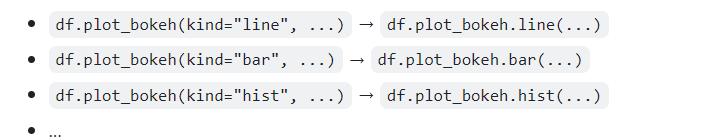

Appears not to work this with Series, only with DataFrames...

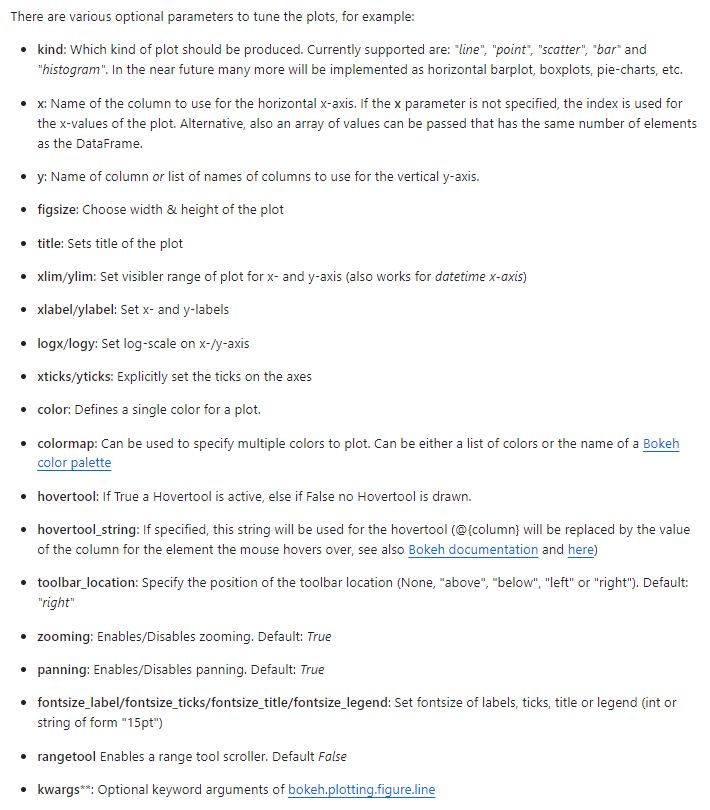

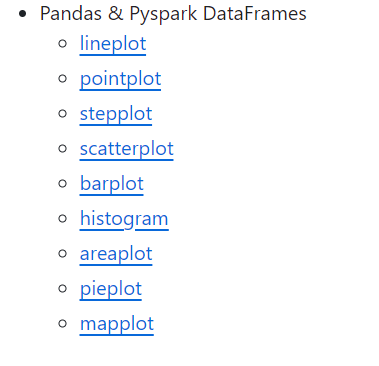

In [137]:
data.plot_bokeh(kind="line")       
data.plot_bokeh.hist(title="Stacked Histogram",stacked=True)

Figure(id='214005', ...)

In [138]:
# More plots
import numpy as np
np.random.seed(42)
df = pd.DataFrame({"Google": np.random.randn(1000)+0.2, 
                   "Apple": np.random.randn(1000)+0.17}, 
                   index=pd.date_range('1/1/2000', periods=1000))
df = df.cumsum()
df = df + 50
df.plot_bokeh(kind="line")       #equivalent to df.plot_bokeh.line()
df.plot_bokeh.line(
    figsize=(800, 450),
    title="Apple vs Google",
    xlabel="Date",
    ylabel="Stock price [$]",
    yticks=[0, 100, 200, 300, 400],
    ylim=(100, 200),
    xlim=("2001-01-01", "2001-02-01"),
    colormap=["red", "blue"],
    plot_data_points=True,
    plot_data_points_size=10,
    marker="asterisk")


ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

df.plot_bokeh(rangetool=True)

Column(id='215135', ...)

In [139]:
# Basically some plot with points...
import numpy as np

x = np.arange(-3, 3, 0.1)
y2 = x**2
y3 = x**3
df = pd.DataFrame({"x": x, "Parabula": y2, "Cube": y3})
df.plot_bokeh(kind="point",
    x="x",
    xticks=range(-3, 4),
    size=5,
    colormap=["#009933", "#ff3399"],
    title="Pointplot (Parabula vs. Cube)",
    marker="x")

Figure(id='215536', ...)

In [140]:
# Dashboard with multiple plots


#Barplot:
data = {
    'fruits':
    ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries'],
    '2015': [2, 1, 4, 3, 2, 4],
    '2016': [5, 3, 3, 2, 4, 6],
    '2017': [3, 2, 4, 4, 5, 3]
}
df = pd.DataFrame(data).set_index("fruits")
p_bar = df.plot_bokeh(
    kind="bar",
    ylabel="Price per Unit [€]",
    title="Fruit prices per Year",
    show_figure=False)

#Lineplot:
np.random.seed(42)
df = pd.DataFrame({
    "Google": np.random.randn(1000) + 0.2,
    "Apple": np.random.randn(1000) + 0.17
},
                  index=pd.date_range('1/1/2000', periods=1000))
df = df.cumsum()
df = df + 50
p_line = df.plot_bokeh(
    kind="line",
    title="Apple vs Google",
    xlabel="Date",
    ylabel="Stock price [$]",
    yticks=[0, 100, 200, 300, 400],
    ylim=(0, 400),
    colormap=["red", "blue"],
    show_figure=False)

#Scatterplot:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"])
df.columns = iris["feature_names"]
df["species"] = iris["target"]
df["species"] = df["species"].map(dict(zip(range(3), iris["target_names"])))
p_scatter = df.plot_bokeh(
    kind="scatter",
    x="petal length (cm)",
    y="sepal width (cm)",
    category="species",
    title="Iris DataSet Visualization",
    show_figure=False)

#Histogram:
df_hist = pd.DataFrame({
    'a': np.random.randn(1000) + 1,
    'b': np.random.randn(1000),
    'c': np.random.randn(1000) - 1
},
                       columns=['a', 'b', 'c'])

p_hist = df_hist.plot_bokeh(
    kind="hist",
    bins=np.arange(-6, 6.5, 0.5),
    vertical_xlabel=True,
    normed=100,
    hovertool=False,
    title="Normal distributions",
    show_figure=False)

#Make Dashboard with Grid Layout:
pandas_bokeh.plot_grid([[p_line, p_bar], 
                        [p_scatter, p_hist]], width=450)

Column(id='216317', ...)

In [141]:
# Alternative Layout Way (Not BAD)
p_line.width = 900
p_hist.width = 900

layout = pandas_bokeh.column(p_line,
                pandas_bokeh.row(p_scatter, p_bar),
                p_hist)

pandas_bokeh.show(layout)

In [142]:
# Stacked Bar
p_stacked_bar = df.plot_bokeh.bar(
    ylabel="Price per Unit [€]",
    title="Fruit prices per Year",
    stacked=True,
    alpha=0.6)

In [143]:
# Histograms
import numpy as np

df_hist = pd.DataFrame({
    'a': np.random.randn(1000) + 1,
    'b': np.random.randn(1000),
    'c': np.random.randn(1000) - 1
    },
    columns=['a', 'b', 'c'])

#Top-on-Top Histogram (Default):
df_hist.plot_bokeh.hist(
    bins=np.linspace(-5, 5, 41),
    vertical_xlabel=True, # X axis vertical
    hovertool=False, # Disable interactive pop up when mouse over plot
    title="Normal distributions (Top-on-Top)",
    line_color="black" # Color of the line of the histogram
    )

#Side-by-Side Histogram (multiple bars share bin side-by-side) also accessible via # I dont quite see the use of this
#kind="hist":
df_hist.plot_bokeh(
    kind="hist",
    bins=np.linspace(-5, 5, 41),
    histogram_type="sidebyside",
    vertical_xlabel=True,
    hovertool=False,
    title="Normal distributions (Side-by-Side)",
    line_color="black")

#Stacked histogram:
df_hist.plot_bokeh.hist(
    bins=np.linspace(-5, 5, 41),
    histogram_type="stacked", # Basicamnete, stacque cada vez que un valor de los histogramas chocan en algun lago uno encima de la otra...
    vertical_xlabel=True,
    hovertool=False,
    title="Normal distributions (Stacked)",
    line_color="black")

Figure(id='218723', ...)

In [144]:
# More histogram
p_hist = df_hist.plot_bokeh.hist(
    y=["a", "b"],
    bins=np.arange(-4, 6.5, 0.5),
    normed=100, # Noramliza en base a 100
    vertical_xlabel=True,
    ylabel="Share[%]",
    title="Normal distributions (normed)",
    show_average=True, # Line on the averege value/mass point de eje x
    xlim=(-4, 6), # Hasta donde ver
    ylim=(0, 30), # Hasta donde ver
    show_figure=False # Storear la figura I no outpear directamente
    )

p_hist_cum = df_hist.plot_bokeh.hist(
    y=["a", "b"],
    bins=np.arange(-4, 6.5, 0.5), # bins size...
    normed=1, # Suma de todos los valores del histograma dan 100!
    cumulative=True, # Histograma acumulado
    vertical_xlabel=True,
    ylabel="Share[%]",
    title="Normal distributions (normed & cumulative)",
    show_figure=False # Storear la figura I no outpear directamente
    )

pandas_bokeh.plot_grid([[p_hist, p_hist_cum]], width=450, height=300) # Note: If you got 4 in a 2*2 array: [[1,2],[3,4]]

Column(id='219482', ...)

In [145]:
# Areaplot
df_energy = pd.read_csv(r"https://raw.githubusercontent.com/PatrikHlobil/Pandas-Bokeh/master/docs/Testdata/energy/energy.csv", 
parse_dates=["Year"])
df_energy.head()

,Year,Oil,Gas,Coal,Nuclear Energy,Hydroelectricity,Other Renewable
0,1970-01-01,2291.5,826.7,1467.3,17.7,265.8,5.8
1,1971-01-01,2427.7,884.8,1459.2,24.9,276.4,6.3
2,1972-01-01,2613.9,933.7,1475.7,34.1,288.9,6.8
3,1973-01-01,2818.1,978.0,1519.6,45.9,292.5,7.3
4,1974-01-01,2777.3,1001.9,1520.9,59.6,321.1,7.7


In [146]:
df_energy.plot_bokeh.area(
    x="Year",
    stacked=True, # Stackea encima
    legend="top_left",
    colormap=["brown", "orange", "black", "grey", "blue", "green"],
    title="Worldwide energy consumption split by energy source",
    ylabel="Million tonnes oil equivalent",
    ylim=(0, 16000))

Figure(id='219975', ...)

In [147]:
df_energy.plot_bokeh.area(
    x="Year",
    stacked=True,
    normed=100, # Noramliza tal que la suma de cada stacked barra suma 100
    legend="bottom_left",
    colormap=["brown", "orange", "black", "grey", "blue", "green"],
    title="Worldwide energy consumption split by energy source (% by type)",
    ylabel="Million tonnes oil equivalent")

Figure(id='220805', ...)